In [1]:
print("!pip install parimal")

!pip install parimal


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [5]:
data = pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.shape

(301, 9)

In [7]:
data.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [8]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [14]:
data.replace({'Fuel_Type':{'Petrol':'0', 'Diesel':'1', 'CNG':'2'}, 'Seller_Type':{'Dealer':'0', 'Individual':'1'}, 'Transmission':{'Manual':'0', 'Automatic':'1'}}, inplace=True)


In [15]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [16]:
X = data.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
Y = data['Selling_Price']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [18]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation

In [19]:
x_train_pred = model.predict(X_train)

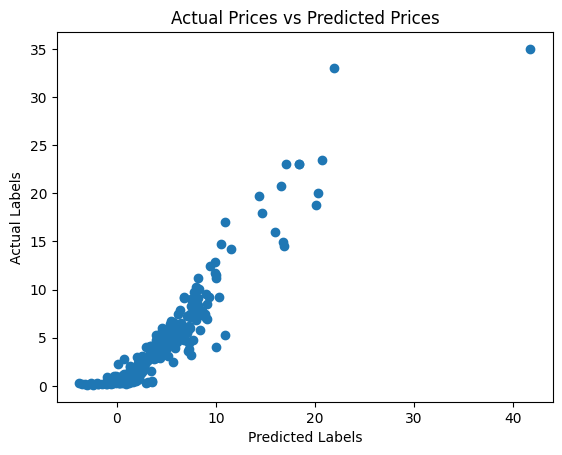

In [20]:
plt.scatter(x_train_pred, Y_train)
plt.title("Actual Prices vs Predicted Prices")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [21]:
eval = metrics.r2_score(x_train_pred, Y_train)
eval

0.8635655509199022

# Model evaluation on test data

In [22]:
y_pred = model.predict(X_test)
eval1 = metrics.r2_score(y_pred, Y_test)

In [23]:
eval1

0.8062199941176205

# Lasso Regression

In [24]:
model = Lasso()
model.fit(X_train, Y_train)

Lasso()

In [25]:
y_predL = model.predict(X_test)
score = metrics.r2_score(y_predL, Y_test)
score

0.7711110403265509